#### Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

2023-12-14 10:00:18.321099: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-14 10:00:18.446726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 10:00:18.446900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 10:00:18.478050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 10:00:18.523979: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-14 10:00:18.525013: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
## Load the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
## Converting the image_label into a single dimension array
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot_sample(images,labels,index):
    plt.figure(figsize=(5,2))
    plt.imshow(images[index])
    plt.xlabel(class_names[labels[index]])

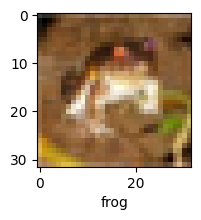

In [9]:
plot_sample(train_images,train_labels,0)

In [10]:
# Normalizing the training and testing images
train_images = train_images / 255.0
test_images = test_images / 255.0  

In [11]:


ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])


ann_model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

ann_model.fit(train_images,train_labels,epochs=5)

2023-12-14 10:00:35.183655: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.8138 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6232 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5415 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4807 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4314 - accuracy: 0.4954


In [12]:
## If our data is one Hot encoded then we use categorical_crossentropy
## If our data is labels then we use sparse_categorical_crossentropy


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann_model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))

  5/313 [..............................] - ETA: 4s 

2023-12-14 10:06:00.866381: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.66      0.50      0.57      1000
           2       0.35      0.43      0.39      1000
           3       0.37      0.32      0.35      1000
           4       0.41      0.40      0.40      1000
           5       0.48      0.27      0.35      1000
           6       0.56      0.48      0.52      1000
           7       0.42      0.71      0.53      1000
           8       0.78      0.40      0.53      1000
           9       0.46      0.66      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [13]:
report = classification_report(test_images, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

ValueError: Classification metrics can't handle a mix of unknown and continuous-multioutput targets

In [ ]:
## Creating a cnn model for the image classification

cnn_model = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn_model.compile(
    optimizer='adam',          
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])   

In [14]:
cnn_model.fit(train_images,train_labels,epochs=10)

NameError: name 'cnn_model' is not defined